In [1]:
using Distributions, LinearAlgebra, Statistics, Plots, StatsPlots, Optim

In [2]:
f(x) = 2 + 3*x+4+x^2+5*x^4 

f (generic function with 1 method)

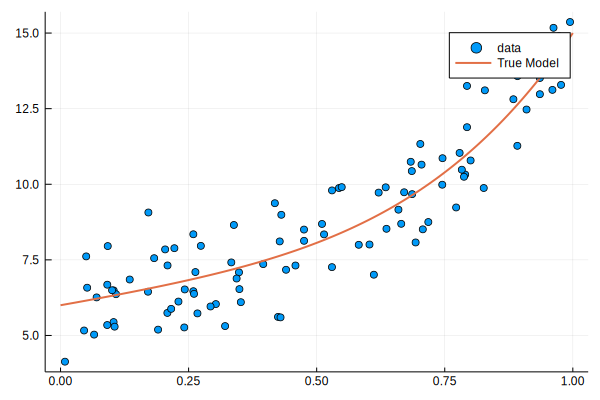

In [3]:
N = 100
x_vec = 0:0.01:1
xdata = rand(Uniform(),N)
ydata = f.(xdata) + rand(Normal(),N)
scatter(xdata,ydata, label = "data")
plot!(0:0.01:1, f.(0:0.01:1), label="True Model", linewidth=2)

In [4]:
A = [ones(N) xdata ]
β= pinv(A)*ydata

2-element Array{Float64,1}:
 4.735537102536897
 8.10846727223581 

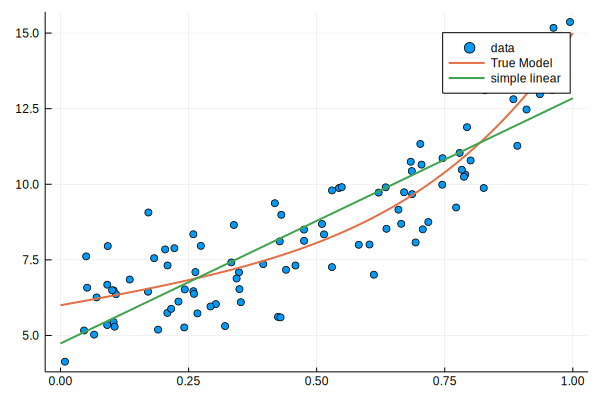

In [5]:
plot!(x_vec, β[1] .+ β[2]*x_vec, label="simple linear", linewidth=2)

In [6]:
A_2 = [ones(N) xdata xdata .^2]
β_2 = pinv(A_2)*ydata

3-element Array{Float64,1}:
  6.348959077825929 
 -1.4579537286074622
  9.515863064744636 

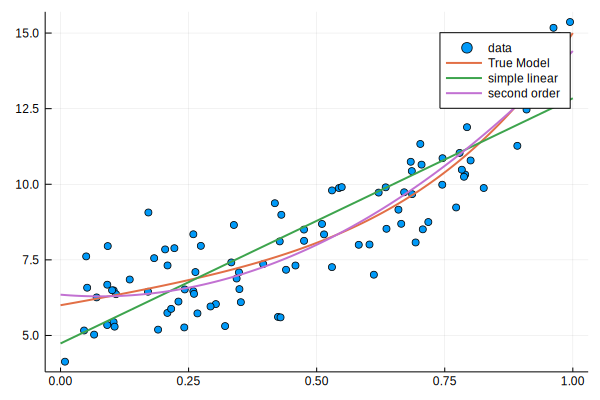

In [7]:
plot!(x_vec, β_2[1] .+ β_2[2]*x_vec .+ β_2[3]* x_vec.^2, label="second order", linewidth=2)

In [8]:
g(x,error) = exp(2+3*x+4*x^2+5*x^3+error)/(1+exp(2+3*x+4*x^2+5*x^3+error))
g_t(x, b1=2, b2=3, b3=4, b4=5) = exp(b1+b2*x+b3*x^2+b4*x^3)/(1+exp(b1+b2*x+b3*x^2+b4*x^3))

g_t (generic function with 5 methods)

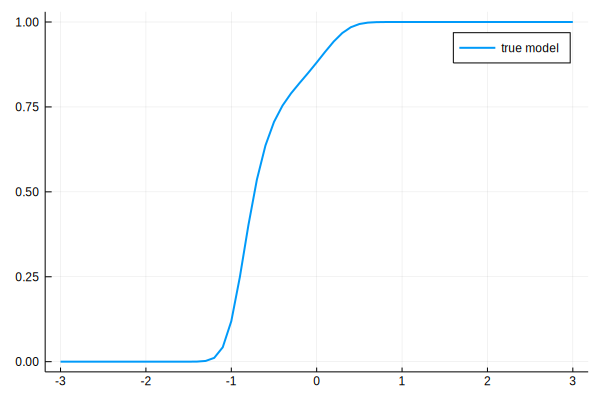

In [9]:
x_vec = -3:0.1:3
plot(x_vec, g_t.(x_vec), label="true model", linewidth=2)

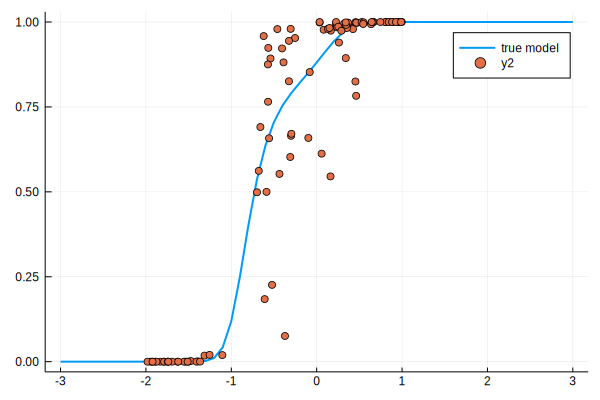

In [10]:
xdata = rand(Uniform(-2,1),100)
ydata = g.(xdata, rand(Normal(1,2),length(xdata)))
scatter!(xdata,ydata)

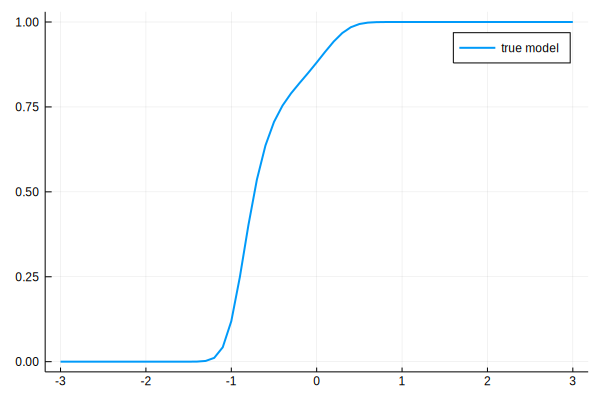

In [11]:
l(b) = g_t.(xdata,b[1],b[2],b[3],b[4])
# mle(b) = -log(prod(pdf.(Normal(1,2),(ydata-l(b)))))
mle(b) = -(prod(exp.(-(ydata-l(b).-1).^2 ./8)./(2*sqrt(2*pi))))
out = optimize(mle,[2.0,2.,2.0,2.])
plot(x_vec, g_t.(x_vec), label="true model", linewidth=2)

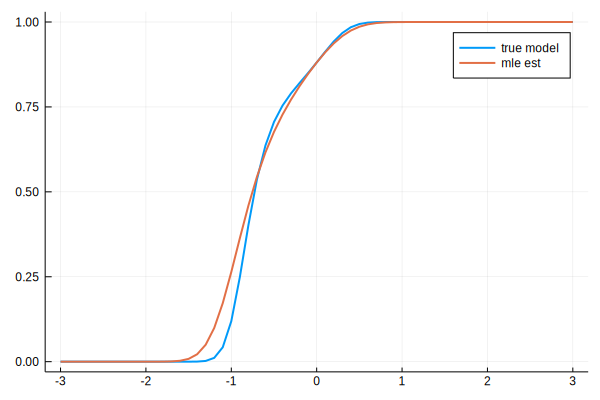

In [12]:
est(x) = g_t(x,out.minimizer[1],out.minimizer[2],out.minimizer[3],out.minimizer[4])
plot!(x_vec,est.(x_vec),linewidth=2, label="mle est")

In [13]:
function c1(x)
    if x < 0.25
        return 1
    else
        return 0
    end
end

function c2(x)
    if x >= 0.25 && x < 0.5
        return 1
    else
        return 0
    end
end

function c3(x)
    if x >= 0.5 && x < 0.75
        return 1
    else
        return 0
    end
end

function c4(x)
    if x >=0.75
        return 1
    else
        return 0
    end
end

c4 (generic function with 1 method)

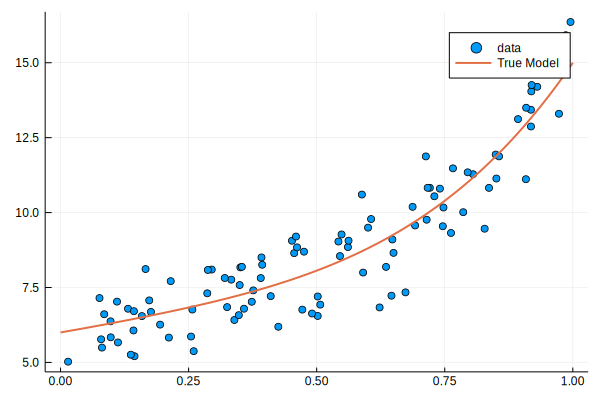

In [14]:
N = 100
x_vec = 0:0.01:1
xdata = rand(Uniform(),N)
ydata = f.(xdata) + rand(Normal(),N)
scatter(xdata,ydata, label = "data")
plot!(0:0.01:1, f.(0:0.01:1), label="True Model", linewidth=2)

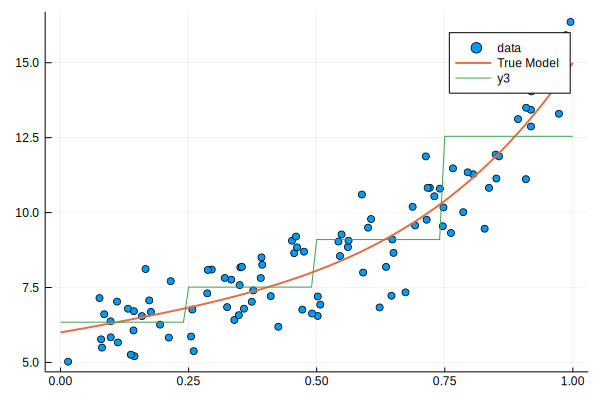

In [15]:
A_step = [ones(N) c1.(xdata) c2.(xdata) c3.(xdata) c4.(xdata)]
β_st = pinv(A_step)*ydata
# plot!(x_vec, (β_st[1].+β_st[2]*c1.(x_vec).+β_st[3]*c2.(x_vec).+β_st[4]*c3.(x_vec).+β_st[5]*c4.(x_vec)),linewidth=2)
 est_y =β_st[1].+β_st[2]*c1.(x_vec) .+ β_st[3]*c2.(x_vec) .+ β_st[4]*c3.(x_vec).+β_st[5]*c4.(x_vec)
length(x_vec),length(est_y)
plot!(x_vec, est_y)

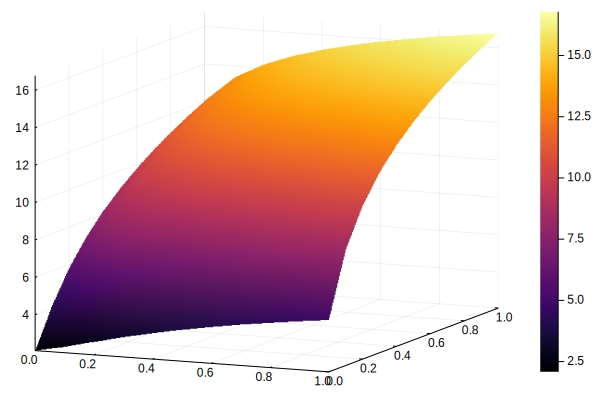

In [16]:
f(x) = x[1]^4+x[1]^2+x[1]+1
h(x) = x[1]^5*x[2]^2+3*x[1]^3+5*x[1] - x[1]
  # out = optimize(f,-10., Newton())
xvec = 0:0.1:1

z = zeros(length(xvec),length(xvec))
for i in 1:length(xvec), j in 1:length(xvec)
    z[i,j] = log(h([i,j]))
end
surface(xvec,xvec,z)

In [17]:
(g_ct(x; b1=2, b2=3, b3=4, b4=5,f1=f(x)=x, f2=f2(x)=x^2, f3=f3(x)=x^3,f4=f4(x)=x^4) 
= exp(b1+(b2*f1(x))+(b3*f2(x))+(b4*f3(x)))/(1+exp(b1+(b2*f1(x))+(b3*f2(x))+(b4*f3(x)))))
l2(b) = g_ct.(xdata,b[1],b[2],b[3],b[4],c1,c2,c3,c4)
mle(b) = -log(prod(exp.(-(ydata-l2(b).-1).^2 ./8)./(2*sqrt(2*pi))))
out = optimize(mle,[2.,3.0,4.0,5.0])
# mle([1,1,11,1])

MethodError: MethodError: no method matching g_ct(::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::typeof(c1), ::typeof(c2), ::typeof(c3), ::typeof(c4))
Closest candidates are:
  g_ct(::Any; b1, b2, b3, b4, f, f1, f2, f2, f3, f3, f4, f4) at In[17]:2

In [18]:
m = out.minimizer
curve = g_ct.(x_vec,m[1],m[2],m[3],m[4], c1,c2,c3,c4)
x_vec=-1:0.01:1
plot(x_vec,curve)
plot!(x_vec,g_ct.(x_vec,f1=c1,f2=c2,f3=c3,f4=c4))
# plot!(x_vec, g_t.(x_vec), label="true model", linewidth=2)

MethodError: MethodError: no method matching g_ct(::Float64, ::Float64, ::Float64, ::Float64, ::Float64, ::typeof(c1), ::typeof(c2), ::typeof(c3), ::typeof(c4))
Closest candidates are:
  g_ct(::Any; b1, b2, b3, b4, f, f1, f2, f2, f3, f3, f4, f4) at In[17]:2

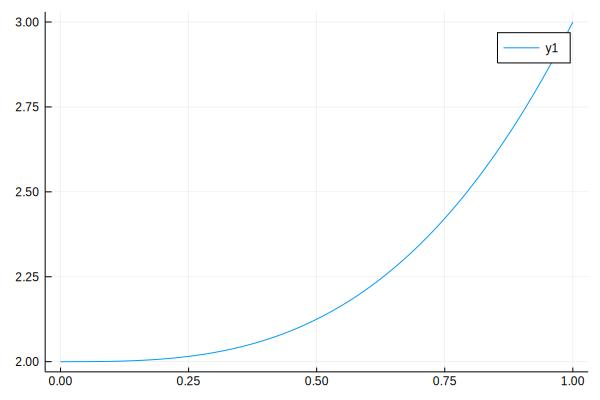

In [19]:
f(x,g=g(a)=a^2,b=2) = g(x)+b
g(x) = x^3
plot(x_vec,f.(x_vec,g))

In [20]:
ips = 5.0
function h(x,i=ips)
    if(x > i)
        return (x-i)^3
    else
        return 0
    end
end
f1(x) = 3*x^3+4*x^2+4*x+1+1000*h(x)
f2(x) = x^3+5*x^2+9*x+100+1000*h(x)

function num1(x)
    if x < ips
        return f2(x)
    elseif x >=ips && x <= 2*ips
        return f1(x)
    end
end
num1(4.99), f1(4.99)
# num1(5.01), f2(5.01)

(393.66199900000004, 493.31489700000003)

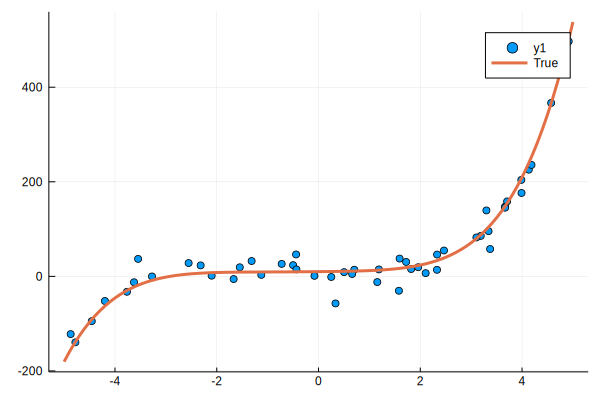

In [21]:
xvec = -5:0.1:5
N=50
model(x) = (1/10)*x^5+(1/4)*x^4+(1/3)*x^3+(1/2)*x^2+x+10
x_data = rand(Uniform(-5,5),N)
y_data = model.(x_data) .+ rand(Normal(0,20),N)
scatter(x_data,y_data)
plot!(xvec,model.(xvec), linewidth=3, label="True")

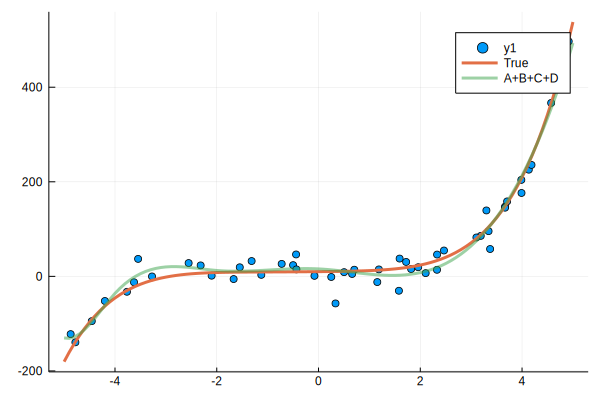

In [22]:
A1 = [ones(N) x_data x_data.^2 x_data.^3 (x_data.>-2).*(x_data.+2).^3 (x_data .> 0).*(x_data).^3 (x_data.>-4).*(x_data.+4).^3]
beta1 = pinv(A1)*y_data

# A = [ones(N) x_data x_data.^2 x_data.^3]
# beta = pinv(A)*y_data
g1(x) = beta1[1] + beta1[2]*x + beta1[3]*x^2 + beta1[4]*x^3
g2(x) = beta1[5]*(x>-2)*(x+2)^3
g3(x) = beta1[6]*(x>0)*(x+0)^3
g4(x) = beta1[7]*(x>-4)*(x+4)^3
# plot!(xvec, g1.(xvec),linewidth=2, label="A")
# plot!(xvec, g4.(xvec),linewidth=2, label="B")
plot!(xvec, (g1.(xvec).+g2.(xvec).+g3.(xvec).+g4.(xvec)), linewidth=3, label="A+B+C+D", alpha=0.5)
# g3.(xvec)
# cond(A1)

In [23]:
using QuadGK

In [24]:
a(x,y) = exp(-x^2)+exp(-y^2)
integral, err = quadgk(a, 0,1,0,1)

MethodError: MethodError: no method matching a(::Float64)
Closest candidates are:
  a(::Any, !Matched::Any) at In[24]:1

In [25]:
b2=2
b3=3
func(x,b0,b1,b2,b3) = b0+b1*x+b2*x^2+b3*x^3
func2(x,b=[1,2]) = 2*b[1]+6*b[2]*x
func3(b) = func2()

func3 (generic function with 1 method)

In [26]:
# integral = quadgk(func2, -5, 5)

In [28]:
fun(x) = 2*x^2+x+1
f1(x,h=(10^(keta_suu(x)+1)/100000000)) = (fun((x+h))-fun(x))/h
f2(x,h=(10^(keta_suu(x)+1)/1000000)) = (f1((x+h))-f1(x))/h
function keta_suu(x)
    return floor(log(10,x))
end

keta_suu (generic function with 1 method)

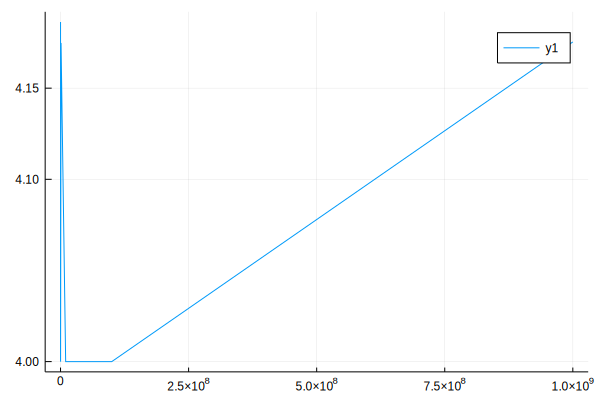

In [59]:
vec = [10^i for i in 1:9]
plot(vec, f2.(vec), yticks=[4,4.1,4.15])
# hline!([4])